In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import colors
import plotly.io as pio
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# from colorspacious import cspace_converter

In [3]:
covid_df=pd.read_csv("C:/Users/sriro/Downloads/archive/Latest Covid-19 India Status.csv")
covid_df.head(10)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10741,0,10612,129,0.00,98.80,1.20,100896618
1,Andhra Pradesh,2339048,9,2324306,14733,0.00,99.37,0.63,128500364
2,Arunachal Pradesh,66887,1,66590,296,0.00,99.56,0.44,658019
3,Assam,746099,0,738064,8035,0.00,98.92,1.08,290492
4,Bihar,851339,18,839019,12302,0.00,98.55,1.45,40100376
5,Chandigarh,99335,7,98147,1181,0.01,98.80,1.19,30501026
6,Chhattisgarh,1177724,14,1163565,14145,0.00,98.80,1.20,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11591,1,11586,4,0.01,99.96,0.03,231502578
8,Delhi,2006921,25,1980379,26517,0.00,98.68,1.32,773997
9,Goa,259016,44,254959,4013,0.02,98.43,1.55,3772103


In [4]:
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [5]:
covid_df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.240877e+06,146.194444,1.225991e+06,14739.222222,0.006944,98.889444,1.104167,3.971861e+07
std,1.833520e+06,393.435333,1.807592e+06,27163.311942,0.009202,0.496991,0.498491,5.050913e+07
min,1.074100e+04,0.000000,1.061200e+04,4.000000,0.000000,97.540000,0.030000,6.600100e+04
25%,1.058578e+05,3.750000,1.048550e+05,1120.750000,0.000000,98.670000,0.842500,1.695473e+06
50%,6.127275e+05,18.000000,6.063080e+05,6541.000000,0.005000,98.925000,1.070000,2.410088e+07
75%,1.320510e+06,75.750000,1.310862e+06,14292.000000,0.010000,99.147500,1.327500,6.979986e+07
max,8.135620e+06,1765.000000,7.986710e+06,148406.000000,0.040000,99.960000,2.460000,2.315026e+08


In [9]:
vaccine_df=pd.read_csv("C:/Users/sriro/Downloads/archive/COVID-19 India Statewise Vaccine Data.csv")

In [10]:
vaccine_df.head(10)

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364
5,Chandigarh,2001114,1088086,913028,1158040
6,Chhattisgarh,36927545,18855121,18072424,32199722
7,Dadra and Nagar Haveli and Daman and Diu,1319914,729023,590891,773997
8,Delhi,30710281,16555043,14155238,19301096
9,Goa,2572559,1353009,1219550,1521992


In [ ]:
# create new table from covid_df
statewise=pd.pivot_table(covid_df,values=["Active","Deaths","Discharged"],index="State/UTs",aggfunc=max)

In [ ]:
statewise["Recovery"]=statewise["Discharged"]*100/statewise["Active"]

In [ ]:
statewise=statewise.sort_values(by="Active",ascending=False)

In [ ]:

statewise.style.background_gradient(cmap = mpl.colormaps["cubehelix"])

,Active,Deaths,Discharged,Recovery
State/UTs,,,,
Kerala,1765,71490,6752658,382586.855524
Karnataka,1618,40303,4029183,249022.435105
Maharashtra,504,148406,7986710,1584664.682540
Tamil Nadu,293,38049,3555720,1213556.313993
Gujarat,221,11043,1266158,572922.171946
Uttar Pradesh,140,23632,2104248,1503034.285714
Odisha,111,9204,1327104,1195589.189189
Rajasthan,106,9653,1305448,1231554.716981
West Bengal,84,21531,2096836,2496233.333333


In [ ]:
statewise.style.background_gradient(cmap='YlOrRd')

,Active,Deaths,Discharged,Recovery
State/UTs,,,,
Kerala,1765,71490,6752658,382586.855524
Karnataka,1618,40303,4029183,249022.435105
Maharashtra,504,148406,7986710,1584664.682540
Tamil Nadu,293,38049,3555720,1213556.313993
Gujarat,221,11043,1266158,572922.171946
Uttar Pradesh,140,23632,2104248,1503034.285714
Odisha,111,9204,1327104,1195589.189189
Rajasthan,106,9653,1305448,1231554.716981
West Bengal,84,21531,2096836,2496233.333333


In [ ]:
statewise.head(20)

,Active,Deaths,Discharged,Recovery
State/UTs,,,,
Kerala,1765,71490,6752658,3.825869e+05
Karnataka,1618,40303,4029183,2.490224e+05
Maharashtra,504,148406,7986710,1.584665e+06
Tamil Nadu,293,38049,3555720,1.213556e+06
Gujarat,221,11043,1266158,5.729222e+05
Uttar Pradesh,140,23632,2104248,1.503034e+06
Odisha,111,9204,1327104,1.195589e+06
Rajasthan,106,9653,1305448,1.231555e+06
West Bengal,84,21531,2096836,2.496233e+06


In [ ]:
covid_df['Current Cases']=(covid_df['Discharged']+covid_df['Deaths'])-covid_df['Active']

In [ ]:
top_10_activecases=covid_df.groupby(by='State/UTs').max()[['Current Cases']].sort_values(by=['Current Cases'],ascending=False).reset_index()

In [ ]:
top_10_activecases.head(30)

,State/UTs,Current Cases
0,Maharashtra,8134612
1,Kerala,6822383
2,Karnataka,4067868
3,Tamil Nadu,3593476
4,Andhra Pradesh,2339030
5,Uttar Pradesh,2127740
6,West Bengal,2118283
7,Delhi,2006871
8,Odisha,1336197
9,Rajasthan,1314995


In [ ]:
fig=plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'TOP 10 STATES WITH MOST ACTIVE CASES IN INDIA')

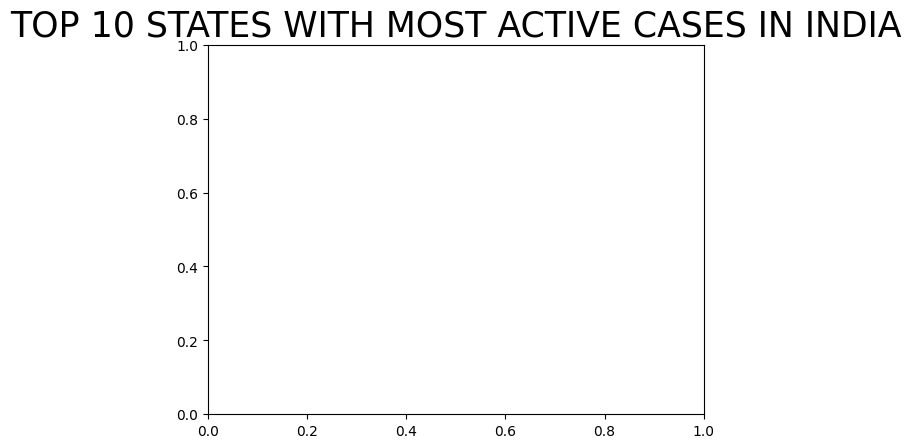

In [ ]:
plt.title("TOP 10 STATES WITH MOST ACTIVE CASES IN INDIA",size=25)

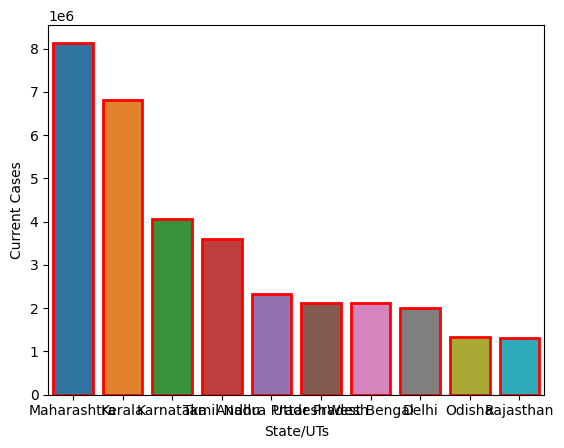

In [ ]:
ax=sns.barplot(data=top_10_activecases.iloc[:10],y="Current Cases",x="State/UTs",linewidth=2,edgecolor='red')

Text(0.5, 0, 'States')

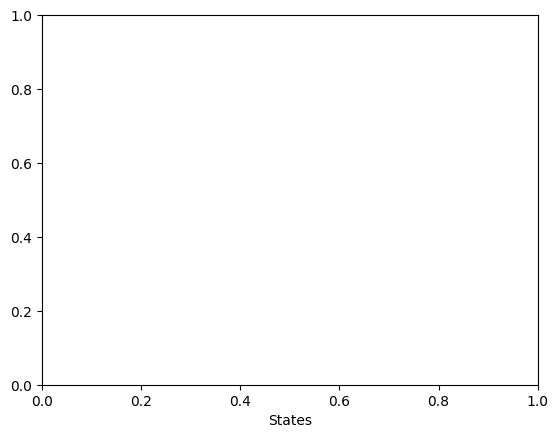

In [ ]:
plt.xlabel("States")

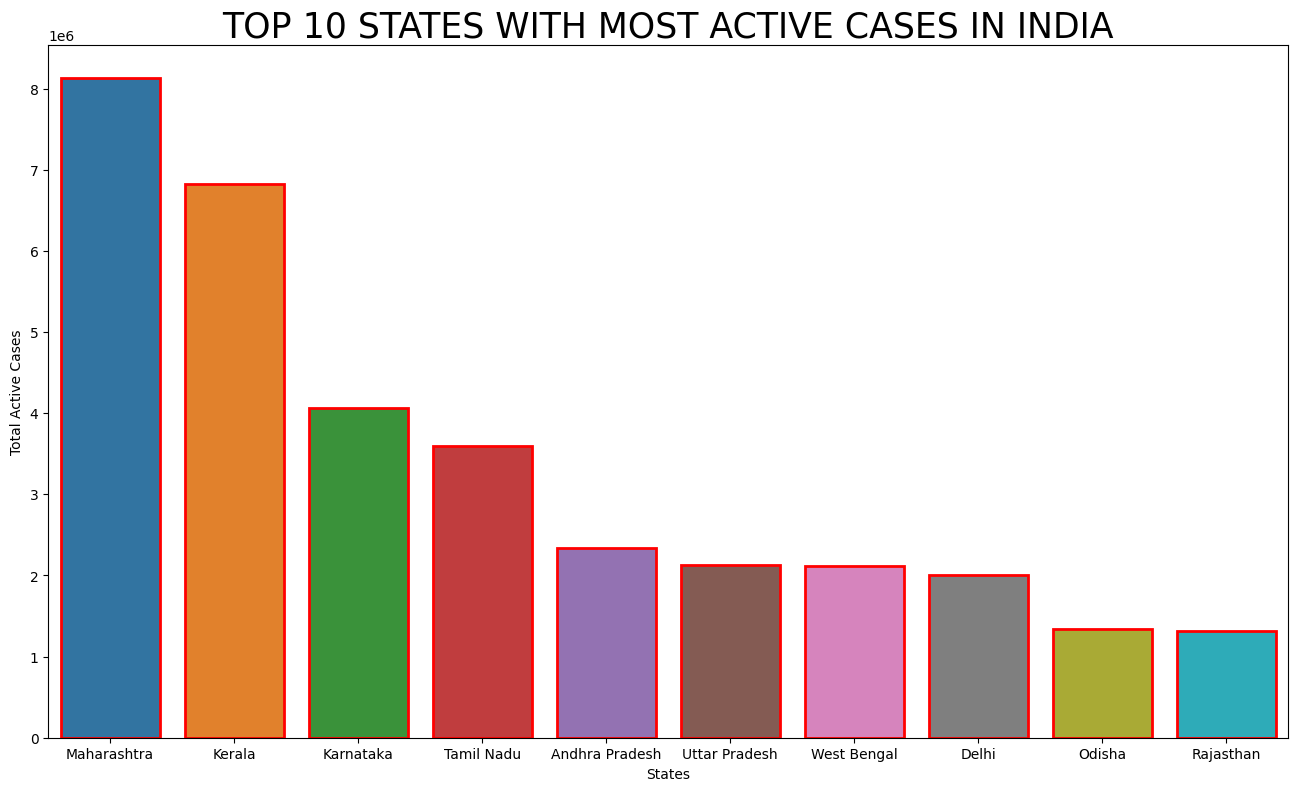

In [ ]:
top_10_activecases=covid_df.groupby(by='State/UTs').max()[['Current Cases']].sort_values(by=['Current Cases'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("TOP 10 STATES WITH MOST ACTIVE CASES IN INDIA",size=25)
ax=sns.barplot(data=top_10_activecases.iloc[:10],y="Current Cases",x="State/UTs",linewidth=2,edgecolor='red')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

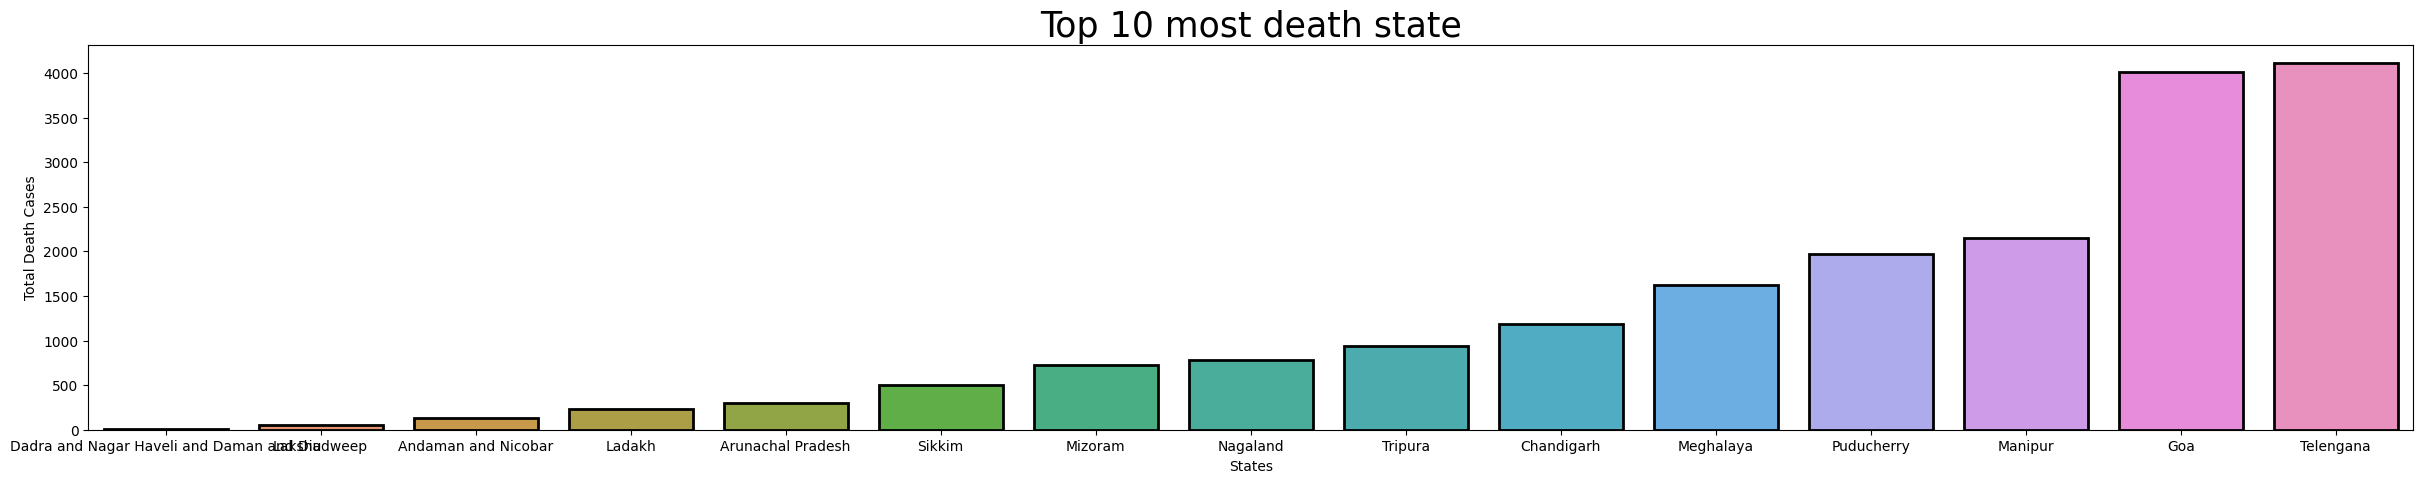

In [ ]:
top_10_deaths=covid_df.groupby(by='State/UTs').max()[['Deaths']].sort_values(by=['Deaths'],ascending=True).reset_index()
fig=plt.figure(figsize=(30,5))
plt.title("Top 10 most death state",size=25)
ax=sns.barplot(data=top_10_deaths.iloc[:15],y="Deaths",x="State/UTs",linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

Text(0.5, 1.0, 'Top 5 Affected States in India')

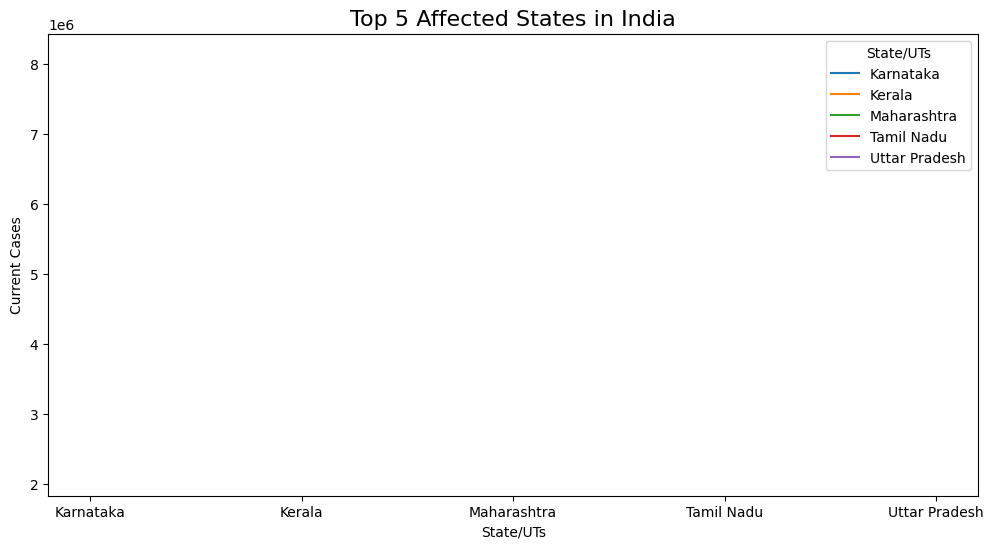

In [ ]:
fig=plt.figure(figsize=(12,6))
ax=sns.lineplot(data=covid_df[covid_df['State/UTs'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],y="Current Cases",x="State/UTs",hue="State/UTs")
ax.set_title("Top 5 Affected States in India",size=16)



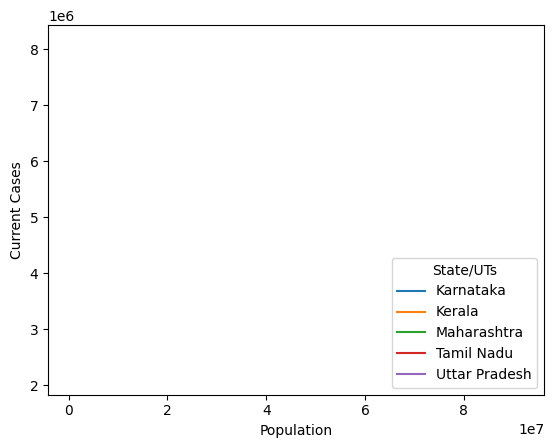

In [ ]:
ax=sns.lineplot(data=covid_df[covid_df['State/UTs'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],y="Current Cases",x="Population",hue="State/UTs")

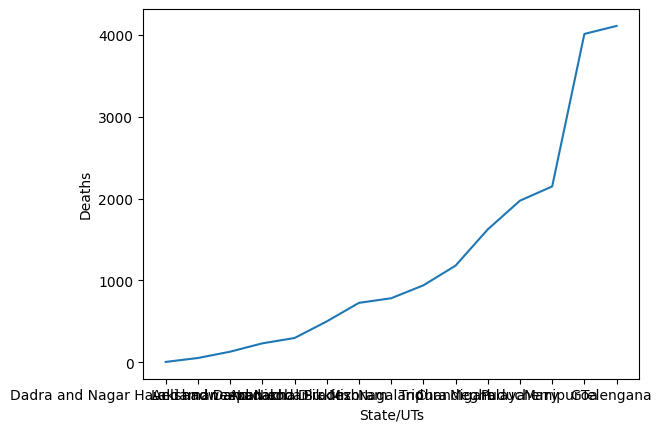

In [ ]:
ax=sns.lineplot(data=top_10_deaths.iloc[:15],y="Deaths",x="State/UTs")


In [11]:
vaccine_df.rename(columns={'State/UTs':'State'},inplace=True)

In [12]:
vaccine_df.head(10)

,State,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,629054,311893,317161,399001
1,Andhra Pradesh,84147957,40624263,43523694,91702478
2,Arunachal Pradesh,1596166,856732,739434,1711947
3,Assam,42998698,22535419,20463279,35998752
4,Bihar,119963226,62590002,57373224,128500364
5,Chandigarh,2001114,1088086,913028,1158040
6,Chhattisgarh,36927545,18855121,18072424,32199722
7,Dadra and Nagar Haveli and Daman and Diu,1319914,729023,590891,773997
8,Delhi,30710281,16555043,14155238,19301096
9,Goa,2572559,1353009,1219550,1521992


In [23]:
# depict dose 1 and dose2
dose1=vaccine_df["Dose 1"].sum()
dose2=vaccine_df["Dose 2"].sum()
px.pie(names=["Dose 2 taken","Dose 1 only"],values=[dose2,dose1-dose2],title="Dose 1 and Dose 2")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Dose 2 taken', 'Dose 1 only'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([854224393,  63463540], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Dose 1 and Dose 2'}}
})

In [25]:
# Remove rows where Active is 0
covid_df=covid_df[covid_df.Active!=0]
covid_df.head(30)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
1,Andhra Pradesh,2339048,9,2324306,14733,0.00,99.37,0.63,128500364
2,Arunachal Pradesh,66887,1,66590,296,0.00,99.56,0.44,658019
4,Bihar,851339,18,839019,12302,0.00,98.55,1.45,40100376
5,Chandigarh,99335,7,98147,1181,0.01,98.80,1.19,30501026
6,Chhattisgarh,1177724,14,1163565,14145,0.00,98.80,1.20,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11591,1,11586,4,0.01,99.96,0.03,231502578
8,Delhi,2006921,25,1980379,26517,0.00,98.68,1.32,773997
9,Goa,259016,44,254959,4013,0.02,98.43,1.55,3772103
10,Gujarat,1277422,221,1266158,11043,0.02,99.12,0.86,70400153
11,Haryana,1056505,50,1045741,10714,0.00,98.98,1.01,7503010


In [13]:
# find missing values
vaccine_df.isnull().sum()

State                      0
Total Vaccination Doses    0
Dose 1                     0
Dose 2                     0
Population                 0
dtype: int64

In [14]:
covid_df.head(10)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10741,0,10612,129,0.00,98.80,1.20,100896618
1,Andhra Pradesh,2339048,9,2324306,14733,0.00,99.37,0.63,128500364
2,Arunachal Pradesh,66887,1,66590,296,0.00,99.56,0.44,658019
3,Assam,746099,0,738064,8035,0.00,98.92,1.08,290492
4,Bihar,851339,18,839019,12302,0.00,98.55,1.45,40100376
5,Chandigarh,99335,7,98147,1181,0.01,98.80,1.19,30501026
6,Chhattisgarh,1177724,14,1163565,14145,0.00,98.80,1.20,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11591,1,11586,4,0.01,99.96,0.03,231502578
8,Delhi,2006921,25,1980379,26517,0.00,98.68,1.32,773997
9,Goa,259016,44,254959,4013,0.02,98.43,1.55,3772103


In [15]:
# delete columns given below
covid_df.drop(columns=['Active Ratio','Discharge Ratio','Death Ratio'],axis=1)

,State/UTs,Total Cases,Active,Discharged,Deaths,Population
0,Andaman and Nicobar,10741,0,10612,129,100896618
1,Andhra Pradesh,2339048,9,2324306,14733,128500364
2,Arunachal Pradesh,66887,1,66590,296,658019
3,Assam,746099,0,738064,8035,290492
4,Bihar,851339,18,839019,12302,40100376
5,Chandigarh,99335,7,98147,1181,30501026
6,Chhattisgarh,1177724,14,1163565,14145,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11591,1,11586,4,231502578
8,Delhi,2006921,25,1980379,26517,773997
9,Goa,259016,44,254959,4013,3772103


In [37]:
# FIND state with most vaccinated and least vaccinated
# vaccine_df.rename(columns={'State/UTs':'State'},inplace=True)
vaccine_df.rename(columns={'Total Vaccination Doses':'Total'},inplace=True)
vaccine_df.head(5)
max_vac=vaccine_df.groupby('State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]
max_vac

,Total
State,
Uttar Pradesh,299773777
Maharashtra,155773246
West Bengal,128418265
Bihar,119963226
Madhya Pradesh,107931053


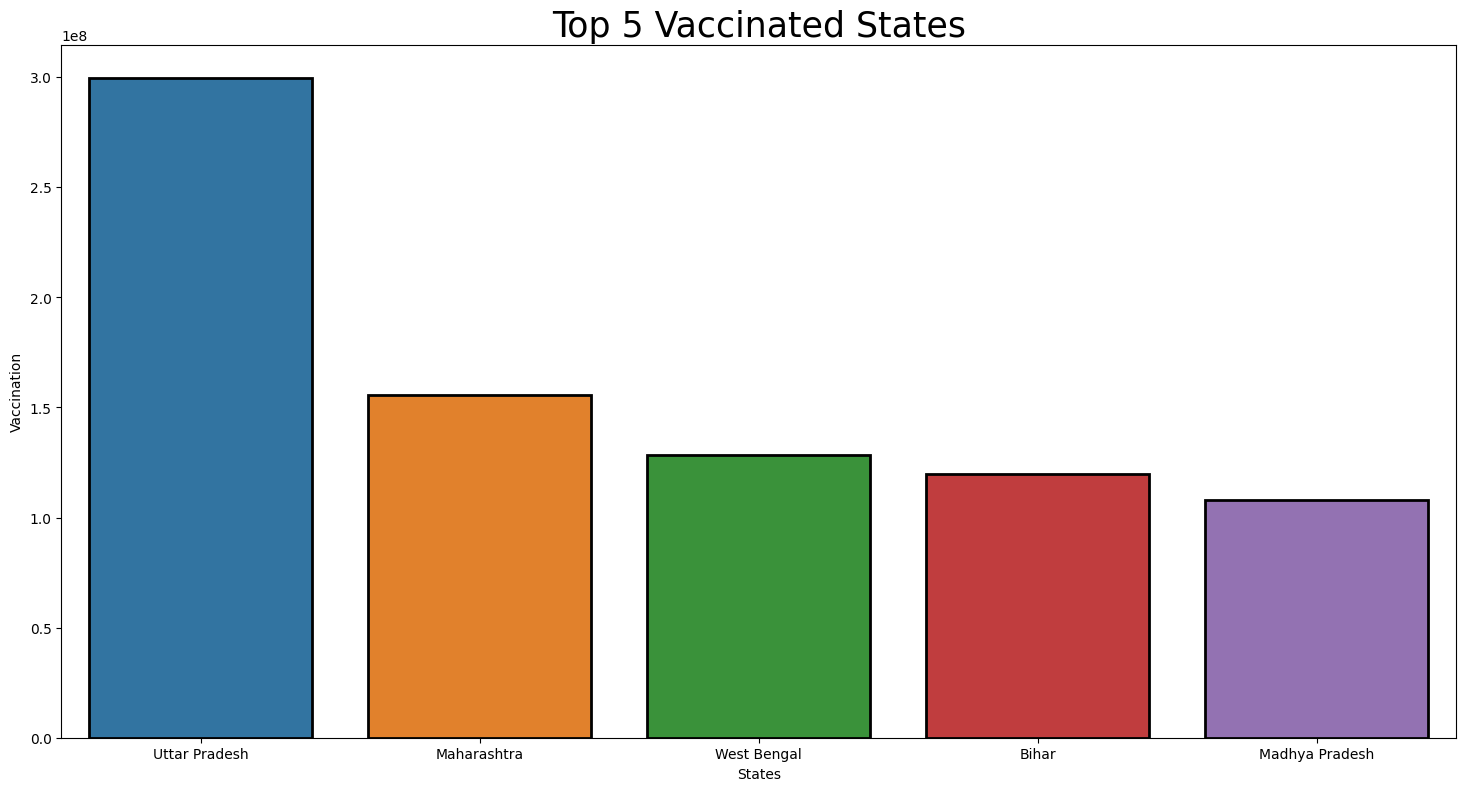

In [38]:
# plot maximum vaccinated states
fig=plt.figure(figsize=(18,9))
plt.title("Top 5 Vaccinated States",size=25)
x=sns.barplot(data=max_vac.iloc[:5],y=max_vac.Total,x=max_vac.index,linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()